In [20]:
import yt
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd ~/project/FLASH4.3/object/fc_sphere_amr_5tff/

/global/project/projectdirs/astro250/doris/FLASH4.3/object/fc_sphere_amr_5tff


In [58]:
radius

YTArray([  4.05949408e+18,   3.88745478e+18,   3.73368848e+18, ...,
         3.73368848e+18,   3.88745478e+18,   4.05949408e+18]) cm

In [74]:
np.where(radius !=data["radius"])[0]

array([], dtype=int64)

In [73]:
radius ==data["radius"]

array([ True,  True,  True, ...,  True,  True,  True], dtype=bool)

In [60]:
data["x"].convert_to_cgs()
data["y"].convert_to_cgs()
data["z"].convert_to_cgs()

YTArray([  1.56250000e+17,   4.68750000e+17,   7.81250000e+17, ...,
         4.21875000e+18,   4.53125000e+18,   4.84375000e+18]) cm

In [62]:
quantity = data["z"]-ctr
print min(quantity)
print max(quantity)

-2.34375e+18 cm
2.34375e+18 cm


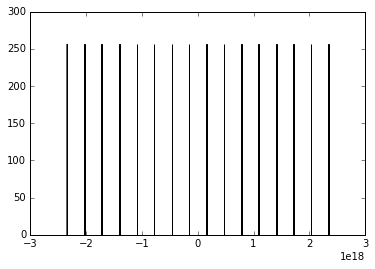

In [68]:
histo  = plt.hist(data["z"]-ctr,bins=500)

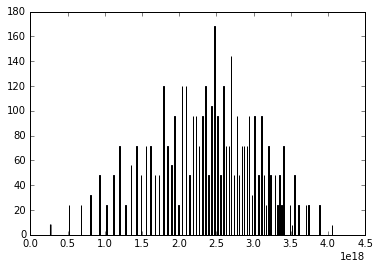

In [69]:
histo  = plt.hist(radius,bins=500)

In [75]:
from yt.units import second, g, cm ,dyne
G = 6.674e-8*cm**3/second**2/g
rho_c = 1.0*g/cm**3
conversion = sqrt(4*pi*G*rho_c)
aT  = 28730*cm/second # for 10K gas 
ctr= 2.5e18*cm
radius = sqrt((data["x"]-ctr)**2+(data["y"]-ctr)**2+(data["z"]-ctr)**2)
def _norm_r(field,data):
    return radius*conversion/aT
def _norm_v(field,data):
    return data["radial_velocity"]/aT
def _norm_d(field,data):
    return data["density"]/rho_c

In [76]:
# yt.add_field("norm_t",function= _norm_t,units="")
yt.add_field("norm_r",function= _norm_r,units="")
yt.add_field("norm_v",function= _norm_v,units="")
yt.add_field("norm_d",function= _norm_d,units="")

In [9]:
i=1
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
data = ds.all_data()

In [78]:
print data["norm_r"]
print data["norm_v"]
print data["norm_d"]

[  1.29400013e+11   1.23916106e+11   1.19014667e+11 ...,   1.19014667e+11
   1.23916106e+11   1.29400013e+11] dimensionless
[-0.09627213 -0.13336876 -0.13669908 ..., -0.13669908 -0.13336876
 -0.09627213] dimensionless
[  1.00000000e-10   1.00000000e-10   1.00000000e-10 ...,   1.00000000e-10
   1.00000000e-10   1.00000000e-10] dimensionless


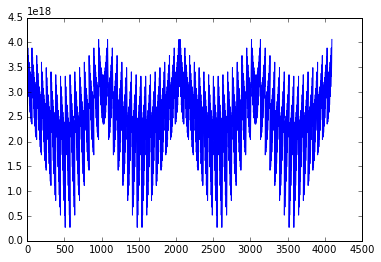

In [79]:
plt.plot(data["radius"])

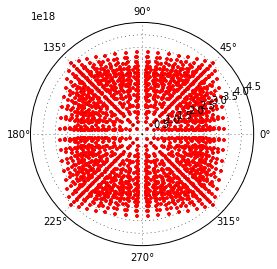

In [80]:
ax = plt.subplot(111, projection='polar')
ax.plot(data['cylindrical_theta'],data["radius"], '.',color='r')
ax.grid(True)
plt.show()

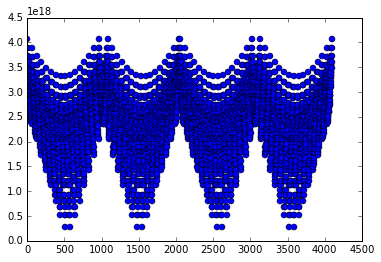

In [81]:
plt.plot(data["radius"],'o')

In [3]:
def plot_dens(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    slc.set_axes_unit('cm')
    slc.annotate_grids()
    slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    slc.show()


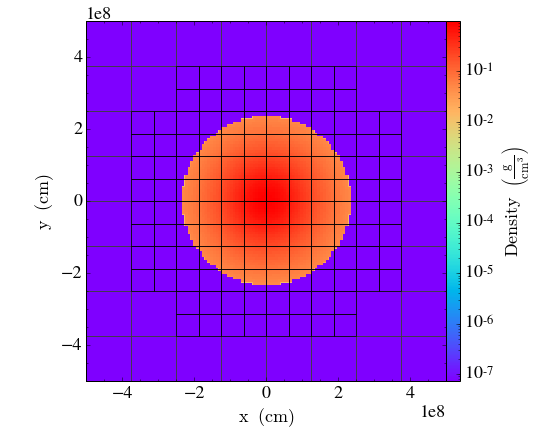

In [8]:
plot_dens(0)

checkpoint files are written every 100 seconds 

In [10]:
def compute_tau(i,round=5):
    return str(i*100*second*conversion)[:round]

In [84]:
def plot_radial_profile(physical_quantity,i,log="loglog"):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    c = ds.find_max(physical_quantity)[1]
    ax = 0 # Cut through x axis
    # cutting through the y0,z0 such that we hit the max density
    ray = ds.ortho_ray(ax, (c[1], c[2]))
    srt = np.argsort(ray['norm_r'])
    plt.xlabel("log xi",fontsize=13)
    if log =="loglog":
        plt.loglog(np.array(ray['norm_r'][srt]), np.array(ray[physical_quantity][srt]),label="tau = {}".format(compute_tau(i)))
        plt.ylabel('log {}'.format(physical_quantity),fontsize=13)
    elif log=="logy":
        plt.semilogx(np.array(ray['norm_r'][srt]), np.array(ray[physical_quantity][srt]),label="tau = {}".format(compute_tau(i)))
        plt.ylabel('{}'.format(physical_quantity),fontsize=13)    

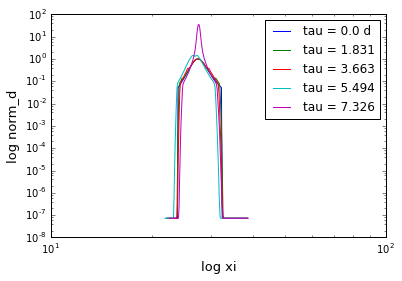

In [87]:
plt.figure()
# plt.subplot(211)
for i in np.arange(100):
    if i%20 ==0 or i==0:
        plot_radial_profile('norm_d',i)
plt.legend()

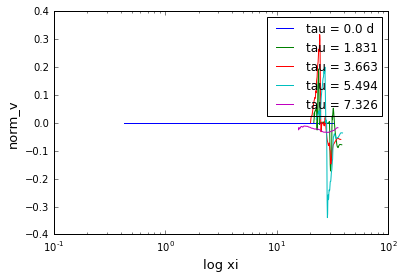

In [88]:
plt.figure()
# plt.subplot(211)
for i in np.arange(100):
    if i%20 ==0 or i==0:
        plot_radial_profile('norm_v',i,log="logy")
plt.legend()

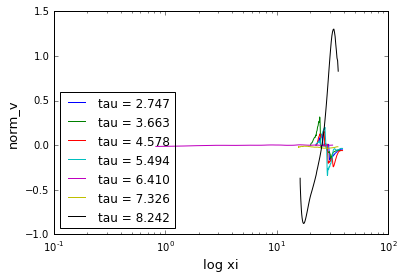

In [89]:
plt.figure()
for i in np.arange(100):
    if i in [30,40,50,60,70,80,90]:
        plot_radial_profile('norm_v',i,log="logy")
plt.legend(loc="lower left")

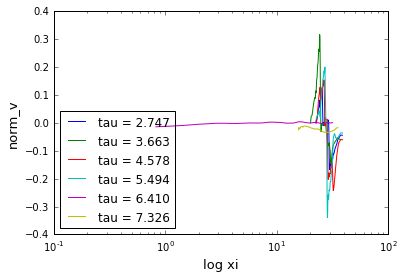

In [90]:
plt.figure()
for i in np.arange(100):
    if i in [30,40,50,60,70,80]:
        plot_radial_profile('norm_v',i,log="logy")
plt.legend(loc="lower left")

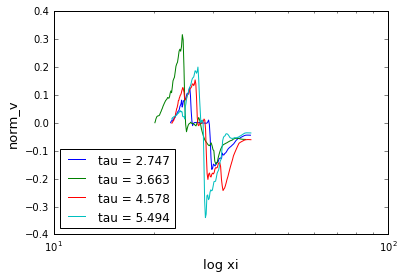

In [91]:
plt.figure()
for i in np.arange(100):
    if i in [30,40,50,60]:
        plot_radial_profile('norm_v',i,log="logy")
plt.legend(loc="lower left")

In [44]:
# ds.derived_field_list

boxlen = 1E9

In [23]:
data["x"][0]

1.5625e+17 code_length

In [24]:
data["y"][0]

1.5625e+17 code_length

In [38]:
quantity = data["x"]
print min(quantity)
print max(quantity)

1.5625e+17 code_length
4.84375e+18 code_length


In [37]:
quantity = data["radius"]
print min(quantity)
print max(quantity)

2.70632938683e+17 cm
4.05949408024e+18 cm


So actually our manual calculation of radius is the same as data["radius"] that means that this is the right radius with center at middle.

# Mass accretion History

In [2]:
import yt
yt.mylog.setLevel(50)
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
cd ~/project/FLASH4.3/object/fc_sphere_amr_5tff/

/global/project/projectdirs/astro250/doris/FLASH4.3/object/fc_sphere_amr_5tff


In [4]:
i=1
ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
data = ds.all_data()
ctr=5e8


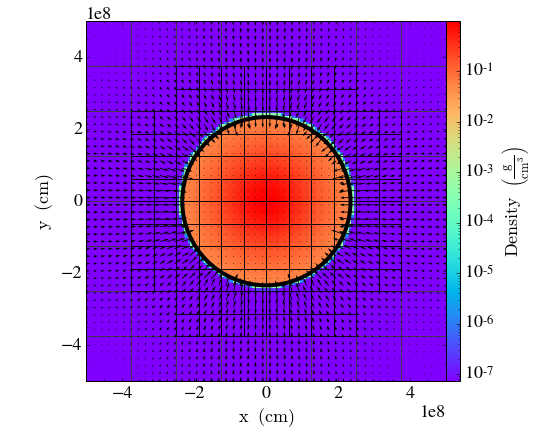

In [38]:
physical_quantity="density"
slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
slc.set_figure_size(5)
slc.set_axes_unit('cm')
slc.annotate_grids()
slc.annotate_velocity()
slc.annotate_sphere([ctr,ctr,ctr], (rmax, "cm"),circle_args={'color':'black','linewidth':4})
slc.set_cmap("all","rainbow")
slc.show()

In [10]:
# def _mdot(field,data):
#     return data["density"]*data["velocity"]*
# yt.add_field("mdot",function= _mdot,units="g/s")

In [36]:
rmax = 2.3368e8
sp = ds.sphere([ctr,ctr,ctr], (rmax, "cm"))
surf = ds.surface(sp, "radius", rmax)

In [37]:
#This step takes a long time
xflux = surf.calculate_flux("velocity_x", "velocity_y", "velocity_z", "angular_momentum_x")
yflux = surf.calculate_flux("velocity_x", "velocity_y", "velocity_z", "angular_momentum_y")
zflux = surf.calculate_flux("velocity_x", "velocity_y", "velocity_z", "angular_momentum_z")

In [39]:
xflux

0.0

In [40]:
yflux

0.0

In [41]:
zflux

0.0

In [42]:
flux = surf.calculate_flux("velocity_x", "velocity_y", "velocity_z", "density")

In [43]:
flux

0.0

In [48]:
rmax*np.ones_like(data["radius"])

YTArray([  2.33680000e+08,   2.33680000e+08,   2.33680000e+08, ...,
         2.33680000e+08,   2.33680000e+08,   2.33680000e+08]) cm

In [73]:
dr = 1e5
rad = data["radius"].value
idx_at_r = np.where(np.isclose(rad, rmax*np.ones_like(rad), atol= dr))[0]

In [74]:
rmax

233680000.0

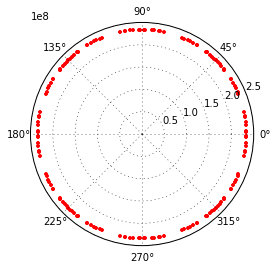

In [75]:
ax = plt.subplot(111, projection='polar')
ax.grid(True)
for i in idx_at_r:
    ax.plot(data['cylindrical_theta'][i],data["radius"][i], '.',color='r')
#     print data["radius"][i]
#     print data["cylindrical_theta"][i]
    

In [77]:
# ds.derived_field_list

In [81]:
data['cell_volume'].convert_to_cgs()

YTArray([  3.81469727e+21,   3.81469727e+21,   3.81469727e+21, ...,
         3.81469727e+21,   3.81469727e+21,   3.81469727e+21]) cm**3

In [85]:
data["cell_volume"][i]**(1/3.)

7812500.0 cm

In [87]:
mdot_list = []
for i in idx_at_r:
    area = data["cell_volume"][i]**(2/3.)
    mdot = data["density"][i]*data["radial_velocity"][i]*area
    mdot_list.append(mdot)
print mdot
    #     print data["radius"][i]
#     print data["cylindrical_theta"][i]    

-8.78492750751e+14 g/s


In [10]:
rmax = 2.3368e8
ctr=5e8
dr = 1e5
mdot_bar_dot_list = []
for tstep in np.arange(110):
    if tstep%20 ==0 or tstep==0:
        print "tstep:",tstep
        ds = yt.load("sod_hdf5_chk_{}".format(str(tstep).zfill(4)))
        data = ds.all_data() 
        data['cell_volume'].convert_to_cgs()
        rad = data["radius"].value
        idx_at_r = np.where(np.isclose(rad, rmax*np.ones_like(rad), atol= dr))[0]
        mdot_list = []
        for i in idx_at_r:
            area = data["cell_volume"][i]**(2/3.)
            mdot = data["density"][i]*data["radial_velocity"][i]*area
            mdot_list.append(mdot)
        mdot_bar_dot_list.append(-mean(mdot_list))

tstep: 0
tstep: 20
tstep: 40
tstep: 60
tstep: 80
tstep: 100


I probably would not trust anything beyond tstep =80 because stuff begins to look weird after that ..

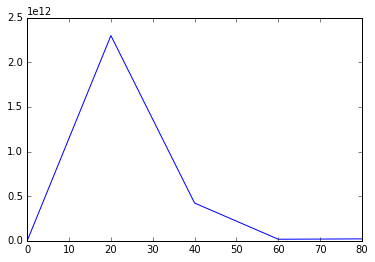

In [11]:
plt.plot(np.arange(0,110,20)[:-1],mdot_bar_dot_list[:-1])

In [54]:
r = 9.4102e6
ctr=5e8
dr = 1e7
mdot_bar_dot_list_1 = []
for tstep in np.arange(100):
#     if tstep%2 ==0 or tstep==0:
    if tstep%2 ==0 or tstep==0:
#         print "tstep:",tstep
        ds = yt.load("sod_hdf5_chk_{}".format(str(tstep).zfill(4)))
        data = ds.all_data() 
        data['cell_volume'].convert_to_cgs()
        rad = data["radius"].value
        idx_at_r = np.where(np.isclose(rad, r*np.ones_like(rad), atol= dr))[0]
#         print idx_at_r
        mdot_list = []
        for i in idx_at_r:
            area = data["cell_volume"][i]**(2/3.)
            mdot = data["density"][i]*data["radial_velocity"][i]*area
#             print mdot
            mdot_list.append(mdot)
        mdot_bar_dot_list_1.append(-mean(mdot_list))

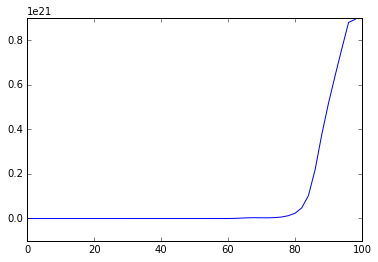

In [55]:
plt.plot(np.arange(0,100,2),mdot_bar_dot_list_1,label="xi = 0.3")

In [56]:
r =3.1367e7
ctr=5e8
dr = 1e7
mdot_bar_dot_list_2 = []
for tstep in np.arange(100):
#     if tstep%2 ==0 or tstep==0:
    if tstep%2 ==0 or tstep==0:
#         print "tstep:",tstep
        ds = yt.load("sod_hdf5_chk_{}".format(str(tstep).zfill(4)))
        data = ds.all_data() 
        data['cell_volume'].convert_to_cgs()
        rad = data["radius"].value
        idx_at_r = np.where(np.isclose(rad, r*np.ones_like(rad), atol= dr))[0]
#         print idx_at_r
        mdot_list = []
        for i in idx_at_r:
            area = data["cell_volume"][i]**(2/3.)
            mdot = data["density"][i]*data["radial_velocity"][i]*area
#             print mdot
            mdot_list.append(mdot)
        mdot_bar_dot_list_2.append(-mean(mdot_list))

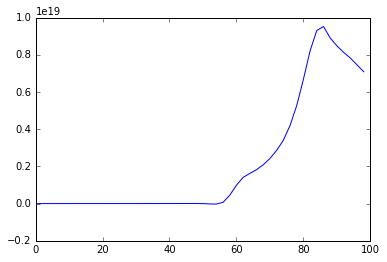

In [57]:
plt.plot(np.arange(0,100,2),mdot_bar_dot_list_2,label="xi = 1.0")

In [58]:
r =9.4102e7
ctr=5e8
dr = 1e7
mdot_bar_dot_list_3 = []
for tstep in np.arange(100):
#     if tstep%2 ==0 or tstep==0:
    if tstep%2 ==0 or tstep==0:
#         print "tstep:",tstep
        ds = yt.load("sod_hdf5_chk_{}".format(str(tstep).zfill(4)))
        data = ds.all_data() 
        data['cell_volume'].convert_to_cgs()
        rad = data["radius"].value
        idx_at_r = np.where(np.isclose(rad, r*np.ones_like(rad), atol= dr))[0]
#         print idx_at_r
        mdot_list = []
        for i in idx_at_r:
            area = data["cell_volume"][i]**(2/3.)
            mdot = data["density"][i]*data["radial_velocity"][i]*area
#             print mdot
            mdot_list.append(mdot)
        mdot_bar_dot_list_3.append(-mean(mdot_list))

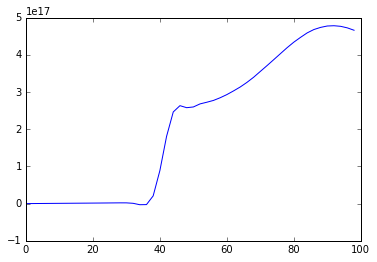

In [59]:
plt.plot(np.arange(0,100,2),mdot_bar_dot_list_3,label="xi = 3.0")

In [60]:
r =3.1367e8
ctr=5e8
dr = 1e7
mdot_bar_dot_list_4 = []
for tstep in np.arange(100):
#     if tstep%2 ==0 or tstep==0:
    if tstep%2 ==0 or tstep==0:
#         print "tstep:",tstep
        ds = yt.load("sod_hdf5_chk_{}".format(str(tstep).zfill(4)))
        data = ds.all_data() 
        data['cell_volume'].convert_to_cgs()
        rad = data["radius"].value
        idx_at_r = np.where(np.isclose(rad, r*np.ones_like(rad), atol= dr))[0]
#         print idx_at_r
        mdot_list = []
        for i in idx_at_r:
            area = data["cell_volume"][i]**(2/3.)
            mdot = data["density"][i]*data["radial_velocity"][i]*area
#             print mdot
            mdot_list.append(mdot)
        mdot_bar_dot_list_4.append(-mean(mdot_list))

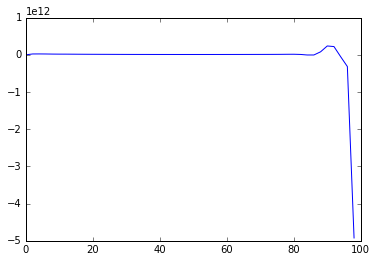

In [61]:
plt.plot(np.arange(0,100,2),mdot_bar_dot_list_4,label="xi = 10.0")

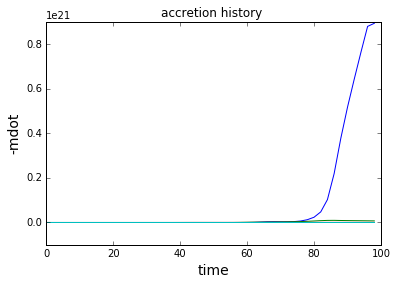

In [62]:
plt.xlabel("time",fontsize=14)
plt.ylabel("-mdot",fontsize=14)
plt.title("accretion history ")
plt.plot(np.arange(0,100,2),mdot_bar_dot_list_1,label="xi = 0.3")
plt.plot(np.arange(0,100,2),mdot_bar_dot_list_2,label="xi = 1.0")
plt.plot(np.arange(0,100,2),mdot_bar_dot_list_3,label="xi = 3.0")
plt.plot(np.arange(0,100,2),mdot_bar_dot_list_4,label="xi = 10.0")

Ohh I think core formation actually means that this is when the program crashes! so all the time is flipped around ! 

In [66]:
mdot_bar_dot_1 = np.fliplr(np.array([mdot_bar_dot_list_1]))[0]
mdot_bar_dot_2 = np.fliplr(np.array([mdot_bar_dot_list_2]))[0]
mdot_bar_dot_3 = np.fliplr(np.array([mdot_bar_dot_list_3]))[0]
mdot_bar_dot_4 = np.fliplr(np.array([mdot_bar_dot_list_4]))[0]

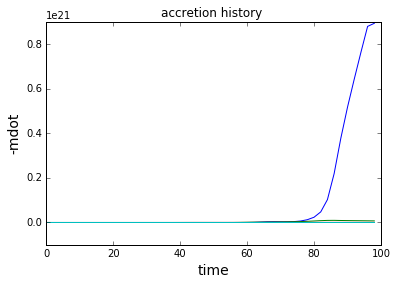

In [99]:
plt.xlabel("time",fontsize=14)
plt.ylabel("-mdot",fontsize=14)
plt.title("accretion history ")
plt.plot(np.arange(0,100,2),mdot_bar_dot_list_1,label="xi = 0.3")
plt.plot(np.arange(0,100,2),mdot_bar_dot_list_2,label="xi = 1.0")
plt.plot(np.arange(0,100,2),mdot_bar_dot_list_3,label="xi = 3.0")
plt.plot(np.arange(0,100,2),mdot_bar_dot_list_4,label="xi = 10.0")

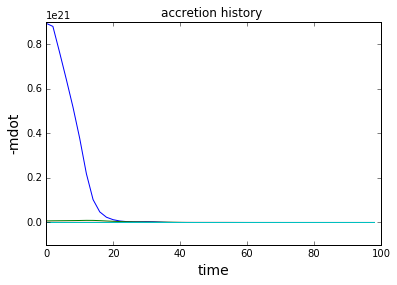

In [86]:
plt.xlabel("time",fontsize=14)
plt.ylabel("-mdot",fontsize=14)
plt.title("accretion history ")
plt.plot(np.arange(0,100,2),mdot_bar_dot_1,label="xi = 0.3")
plt.plot(np.arange(0,100,2),mdot_bar_dot_2,label="xi = 1.0")
plt.plot(np.arange(0,100,2),mdot_bar_dot_3,label="xi = 3.0")
plt.plot(np.arange(0,100,2),mdot_bar_dot_4,label="xi = 10.0")

In [80]:
np.arange(0,100,2)[:40]

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32,
       34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66,
       68, 70, 72, 74, 76, 78])

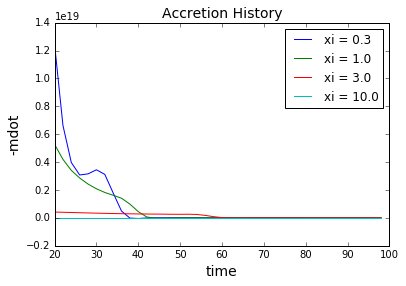

In [101]:
# N = 10
# N2 = 25
N=10
N2=50
plt.xlabel("time",fontsize=14)
plt.ylabel("-mdot",fontsize=14)
plt.title("Accretion History",fontsize=14)
plt.plot(np.arange(0,100,2)[N:N2],mdot_bar_dot_1[N:N2],label="xi = 0.3")
plt.plot(np.arange(0,100,2)[N:N2],mdot_bar_dot_2[N:N2],label="xi = 1.0")
plt.plot(np.arange(0,100,2)[N:N2],mdot_bar_dot_3[N:N2],label="xi = 3.0")
plt.plot(np.arange(0,100,2)[N:N2],mdot_bar_dot_4[N:N2],label="xi = 10.0")
# plt.xlim(np.arange(0,100,2)[N],np.arange(0,100,2)[N2-1])
plt.legend()

In [102]:
ds.derived_field_list

[('flash', u'dens'),
 ('flash', u'eint'),
 ('flash', u'ener'),
 ('flash', u'gamc'),
 ('flash', u'game'),
 ('flash', u'gpol'),
 ('flash', u'gpot'),
 ('flash', u'pres'),
 ('flash', u'temp'),
 ('flash', u'velx'),
 ('flash', u'vely'),
 ('flash', u'velz'),
 ('gas', 'H_nuclei_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'angular_momentum_magnitude'),
 ('gas', 'angular_momentum_x'),
 ('gas', 'angular_momentum_y'),
 ('gas', 'angular_momentum_z'),
 ('gas', 'averaged_density'),
 ('gas', 'baroclinic_vorticity_magnitude'),
 ('gas', 'baroclinic_vorticity_x'),
 ('gas', 'baroclinic_vorticity_y'),
 ('gas', 'baroclinic_vorticity_z'),
 ('gas', 'cell_mass'),
 ('gas', 'courant_time_step'),
 ('gas', 'cutting_plane_velocity_x'),
 ('gas', 'cutting_plane_velocity_y'),
 ('gas', 'cutting_plane_velocity_z'),
 ('gas', 'cylindrical_radial_velocity'),
 ('gas', 'cylindrical_radial_velocity_absolute'),
 ('gas', 'cylindrical_tangential_velocity'),
 ('gas', 'cylindrical_tangential_velocity_absolute'),
 ('gas', 'd